# Machine Learning from the Titanic Disaster

## Importing necessary libraries

In [494]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
pd.set_option('display.max_columns', None)

plt.style.use('ggplot')
sns.set_palette('husl')

# Task 1: Data Exploration and Visualization 
## 1. Load the data

In [495]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

### Inspect Data

In [496]:
df_train.head() # Show the first 5 rows of the dataframe

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,693,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S,1
1,482,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S,0
2,528,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S,0
3,856,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S,1
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,1


In [497]:
df_train.info() # Show the data types of each column and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          575 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        160 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 66.9+ KB


## 2. Analyze key statistics for each feature

In [498]:
df_train.describe(include="all") # Show the summary statistics of the numerical columns

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,712.000000,712.000000,712,712,575.000000,712.000000,712.000000,712,712.000000,160,710,712.000000
unique,NaN,NaN,712,2,NaN,NaN,NaN,571,NaN,127,3,NaN
top,NaN,NaN,"Lam, Mr. Ali",male,NaN,NaN,NaN,1601,NaN,G6,S,NaN
freq,NaN,NaN,1,459,NaN,NaN,NaN,6,NaN,4,516,NaN
mean,444.405899,2.308989,NaN,NaN,29.807687,0.492978,0.390449,NaN,31.819826,NaN,NaN,0.383427
std,257.465527,0.833563,NaN,NaN,14.485211,1.060720,0.838134,NaN,48.059104,NaN,NaN,0.486563
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000
25%,222.750000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,0.000000
50%,439.500000,3.000000,NaN,NaN,28.500000,0.000000,0.000000,NaN,14.454200,NaN,NaN,0.000000
75%,667.250000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,1.000000


In [499]:

categorical_columns = df_train.select_dtypes(include = ['object']).columns
for column in categorical_columns:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

# The code above shows the unique values of the categorical columns that have 10 or fewer unique values which are easier to analyze and visualize

Sex: ['male' 'female']
Embarked: ['S' 'C' 'Q' nan]


In [500]:
numerical_columns = df_train.select_dtypes(include = ['int64', 'float64']).columns
for column in numerical_columns:
    if df_train[column].nunique()<=10:
        print(f'{column}: {df_train[column].unique()}')

# The code above shows the unique values of the numerical columns that have 10 or fewer unique values which are easier to analyze and visualize

Pclass: [3 2 1]
SibSp: [0 1 8 3 4 2 5]
Parch: [0 1 2 5 3 4 6]
Survived: [1 0]


### Extract useful Data from columns before dropping them

In [501]:
# Extract titles from the 'Name' column
df_train['Title'] = df_train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df_test['Title'] = df_test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Display unique titles in the training dataset
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Col', 'Miss', 'Rev', 'Major', 'Master', 'Dr', 'Mlle',
       'Lady', 'Sir', 'Ms', 'Jonkheer', 'Don'], dtype=object)

In [502]:
# Query the dataframe to see who the unfamiliar titles are for further classification, if necessary google the title to see if it is a title of nobility

# df_train.query('Title == "Jonkheer"')
# df_train.query('Title == "Mlle"')
df_train.query('Title == "Rev"')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Title
33,151,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,Rev
83,627,2,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,0,Rev
133,849,2,"Harper, Rev. John",male,28.0,0,1,248727,33.000,NaN,S,0,Rev
220,250,2,"Carter, Rev. Ernest Courtenay",male,54.0,1,0,244252,26.000,NaN,S,0,Rev
525,150,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,244310,13.000,NaN,S,0,Rev


### Titles like Dona, Mrs, Miss can be classified as Single Title for eg. Miss Titles like Lady Countess Sir can be classified as Single Title for eg. Honor

In [503]:
def classify_by_title(df: pd.DataFrame):
    title_mapping = {
        'Mlle': 'Miss',
        'Mme': 'Mrs', 
        'Ms': 'Mrs',
        'Dona': 'Mrs',
        'Don': 'Mr',
        'Jonkheer': 'Mr',
        'Capt': 'Military',
        'Rev': 'Professional', 
        'Major': 'Military',
        'Col': 'Military',
        'Dr': 'Professional', 
        'Lady': 'Noble',
        'Countess': 'Noble',
        'Sir': 'Noble'
    }
    df["Title"] = df["Title"].replace(title_mapping)
    return df

df_train =  classify_by_title(df_train)
df_test = classify_by_title(df_test)
df_train['Title'].unique()

array(['Mr', 'Mrs', 'Military', 'Miss', 'Professional', 'Master', 'Noble'],
      dtype=object)

In [504]:
# Drop the columns that are not useful for the analysis
df_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

## 3. Visualize relationships between features

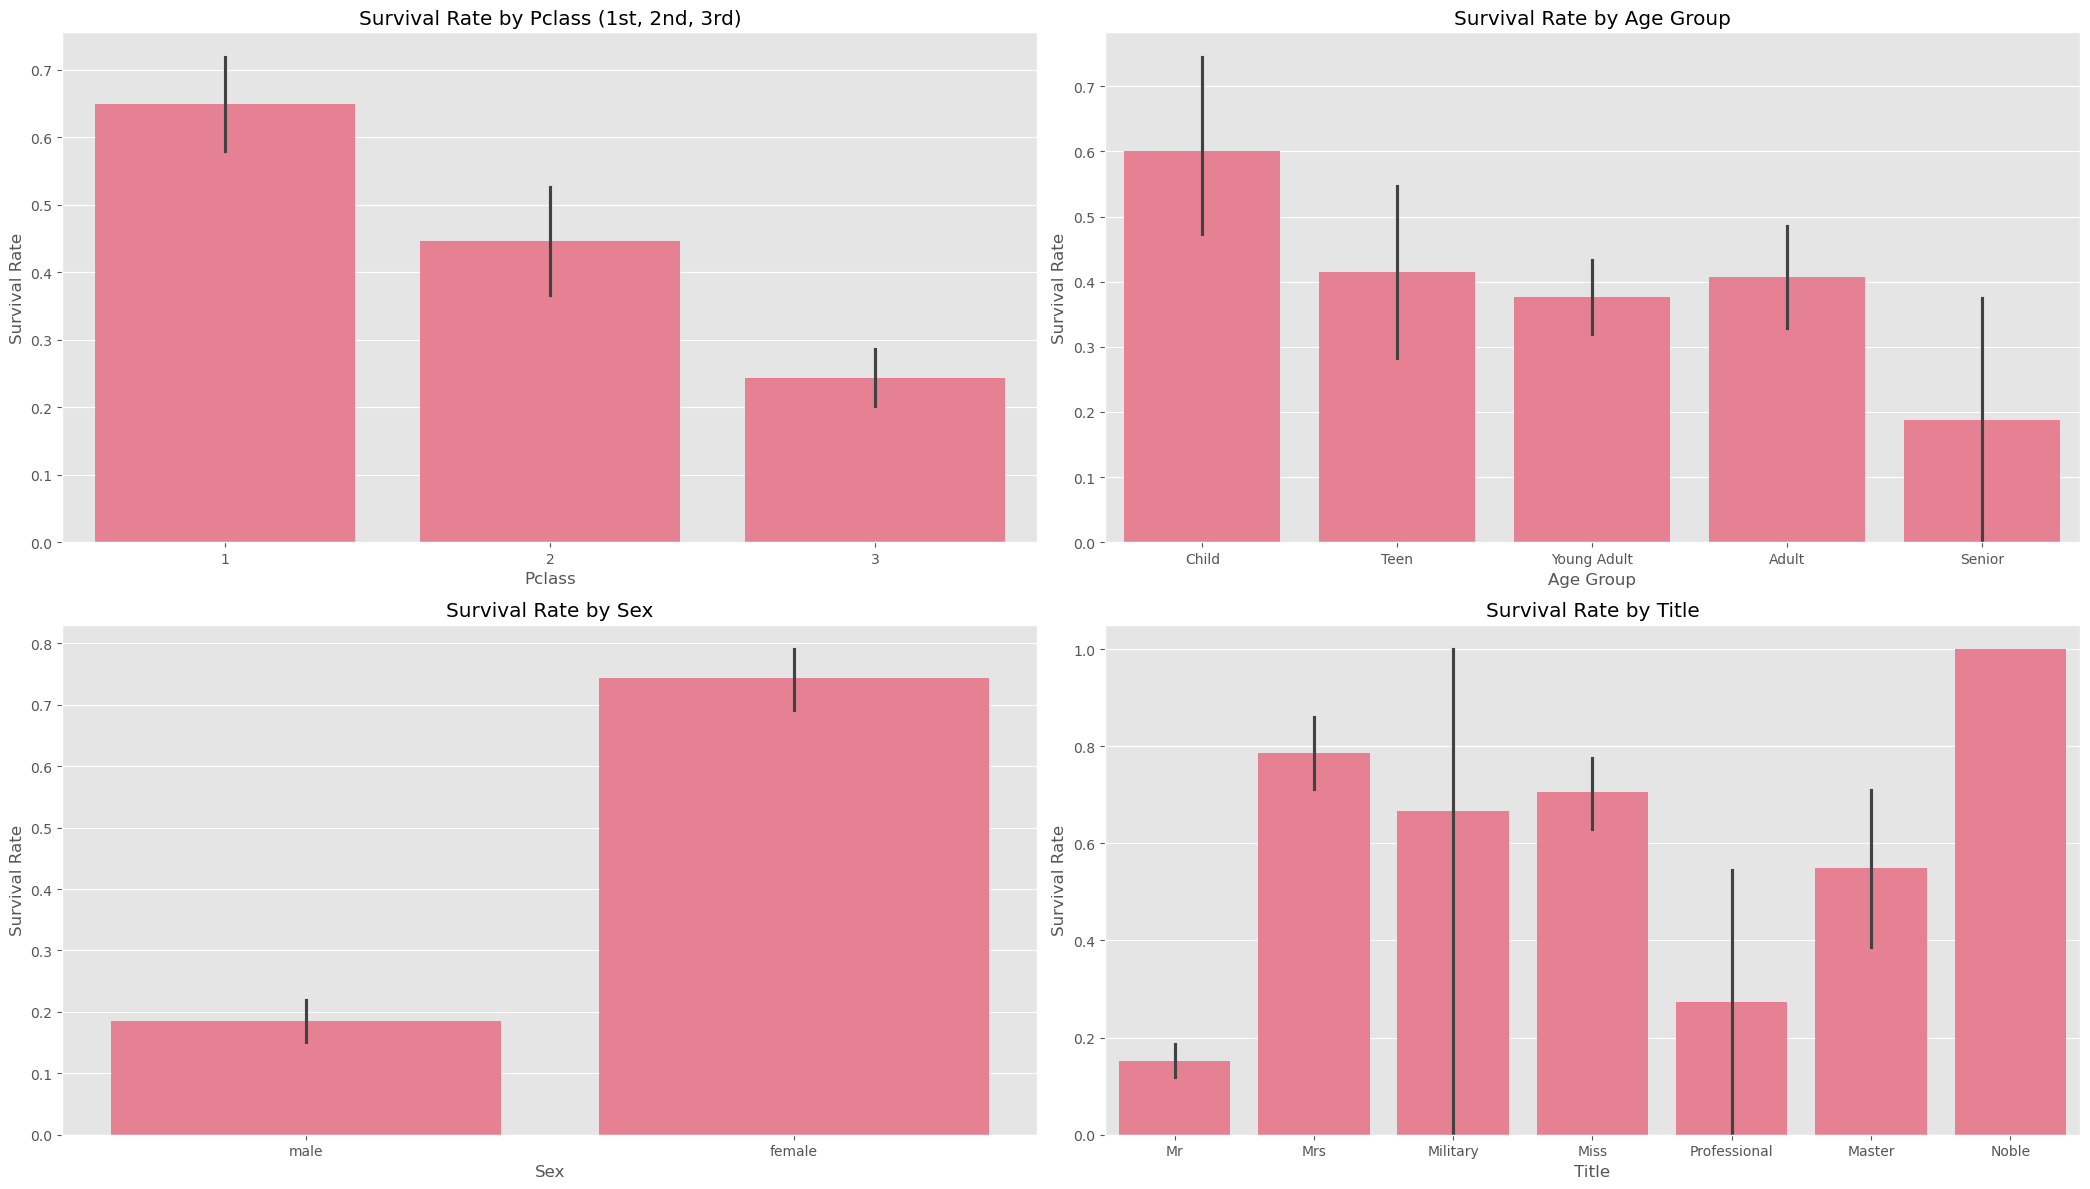

In [505]:
fig, axes = plt.subplots(2, 2, figsize=(21, 12))

# Plot Survival Rate by Pclass
sns.barplot(ax=axes[0, 0], x='Pclass', y='Survived', data=df_train)
axes[0, 0].set_title('Survival Rate by Pclass (1st, 2nd, 3rd)')
axes[0, 0].set_xlabel('Pclass')
axes[0, 0].set_ylabel('Survival Rate')

# Plot Survival Rate by Sex
sns.barplot(ax=axes[1, 0], x='Sex', y='Survived', data=df_train)
axes[1, 0].set_title('Survival Rate by Sex')
axes[1, 0].set_xlabel('Sex')
axes[1, 0].set_ylabel('Survival Rate')

# Plot Survival Rate by Age
# Create age groups
df_train['AgeGroup'] = pd.cut(df_train['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
df_test['AgeGroup'] = pd.cut(df_test['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])

# Plot Survival Rate by Age Group
sns.barplot(ax=axes[0, 1], x='AgeGroup', y='Survived', data=df_train)
axes[0, 1].set_title('Survival Rate by Age Group')
axes[0, 1].set_xlabel('Age Group')
axes[0, 1].set_ylabel('Survival Rate')

# Plot Survival Rate by Title
sns.barplot(ax=axes[1, 1], x='Title', y='Survived', data=df_train)
axes[1, 1].set_title('Survival Rate by Title')
axes[1, 1].set_xlabel('Title')
axes[1, 1].set_ylabel('Survival Rate')

# Display the plots
plt.tight_layout()
plt.show()

# Task 2: Data Cleaning and Preprocessing
## 1. Handle Missing values

In [506]:
df_train.isnull().sum().sort_values(ascending=False) # Show the number of missing values in each column

Age         137
AgeGroup    137
Embarked      2
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Survived      0
Title         0
dtype: int64

In [507]:
df_train.head() # Show the first 5 rows of the dataframe
df_test.head() # Show the first 5 rows of the dataframe

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,male,24.0,2,0,24.1500,S,Mr,Young Adult
1,3,male,44.0,0,1,16.1000,S,Mr,Adult
2,3,male,22.0,0,0,7.2250,C,Mr,Young Adult
3,3,male,41.0,2,0,14.1083,S,Mr,Adult
4,3,female,NaN,1,0,15.5000,Q,Miss,NaN


In [508]:
#  Separate the features and the target variable
features = df_train.drop(['Survived'], axis=1)
target = df_train.Survived

In [509]:
# features.head() # Show the first 5 rows of the 
# target.head() # Show the first 5 rows of the target variable
features.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    712 non-null    int64   
 1   Sex       712 non-null    object  
 2   Age       575 non-null    float64 
 3   SibSp     712 non-null    int64   
 4   Parch     712 non-null    int64   
 5   Fare      712 non-null    float64 
 6   Embarked  710 non-null    object  
 7   Title     712 non-null    object  
 8   AgeGroup  575 non-null    category
dtypes: category(1), float64(2), int64(3), object(3)
memory usage: 45.5+ KB


## 2. Encode the categorical variables

In [510]:
from sklearn.preprocessing import OrdinalEncoder
# Identify categorical columns
is_categorical = (features.dtypes == 'object') | (features.dtypes == "category")
categorical_cols = list(is_categorical[is_categorical].index)

# Initialize Ordinal Encoder
ordinal_encoder = OrdinalEncoder()

# # Fit and transform categorical columns
features[categorical_cols] = ordinal_encoder.fit_transform(features[categorical_cols])
features.head() # Show the first 5 rows of the dataframe

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeGroup
0,3,1.0,NaN,0,0,56.4958,2.0,3.0,NaN
1,2,1.0,NaN,0,0,0.0000,2.0,3.0,NaN
2,1,1.0,NaN,0,0,221.7792,2.0,3.0,NaN
3,3,0.0,18.0,0,1,9.3500,2.0,4.0,3.0
4,2,0.0,31.0,1,1,26.2500,2.0,4.0,4.0


## 3. Normalize/scale numerical features.

In [511]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median') 
X = pd.DataFrame(imputer.fit_transform(features))
y = target

X.columns = features.columns

In [512]:
X.isnull().sum().sort_values(ascending=False) # Show the number of missing values in each column

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
AgeGroup    0
dtype: int64

## Task 3: Feature Engineering 

## 1. Generate new features

In [513]:
def create_new_features(df: pd.DataFrame) -> pd.DataFrame:
    df_new = df.copy()
    df_new['FamilySize'] = df['SibSp'] + df['Parch'] + 1  
    df_new['Alone'] = df_new['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
    # The following has already been done above
    # df_new['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
    # df_new['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    return df_new

X = create_new_features(X)
# X.head()
# X.info()
# X['Alone'].unique()
# X.isnull().sum().sort_values(ascending=False) # Show the number of missing values in each column

### Perform feature selection using correlation analysis

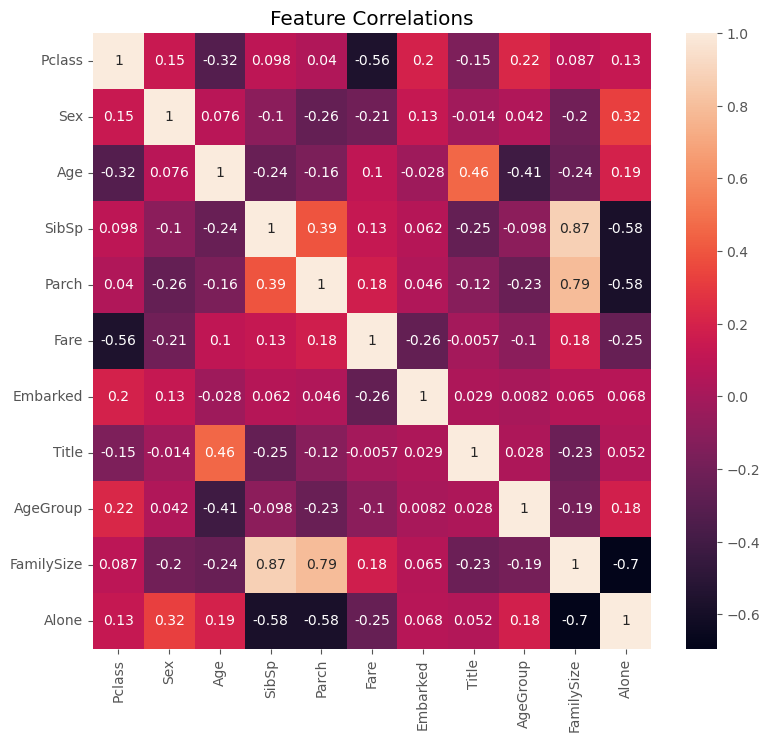

In [514]:
# Check correlations between features
correlation_matrix = X.corr()

# Visualize correlations
plt.figure(figsize=(9,8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlations')
plt.show()

### Remove highly correlated features (e.g. >0.8)

In [515]:
X.drop(['SibSp', 'Parch'], axis=1, inplace=True) # Drop highly correlated features to avoid redundancy
X.head()

,Pclass,Sex,Age,Fare,Embarked,Title,AgeGroup,FamilySize,Alone
0,3.0,1.0,28.5,56.4958,2.0,3.0,3.0,1.0,1
1,2.0,1.0,28.5,0.0000,2.0,3.0,3.0,1.0,1
2,1.0,1.0,28.5,221.7792,2.0,3.0,3.0,1.0,1
3,3.0,0.0,18.0,9.3500,2.0,4.0,3.0,2.0,0
4,2.0,0.0,31.0,26.2500,2.0,4.0,4.0,3.0,0


In [516]:
# Normalize/scale numerical features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Split the dataset into training and validation sets.

In [517]:
# Split the dataset into training and validation sets.
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

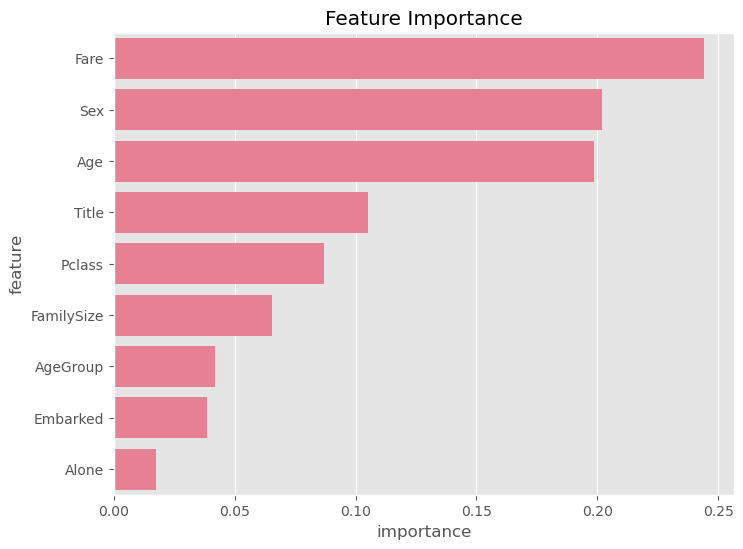

In [518]:
# Feature importance using Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Convert X_train back to DataFrame
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Plot feature importances for better visualization
importances = pd.DataFrame({
    'feature': X_train_df.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(data=importances, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

# Select top features
selected_features = importances[importances['importance'] > 0.10]['feature'].tolist()
X_train_selected = X_train_df[selected_features]

#### I chose to select features with importance greater than 0.1 for the model training so as to reduce the number of features and improve the model performance

In [519]:
selected_features 

['Fare', 'Sex', 'Age', 'Title']

In [520]:
# Perform another split with the selected features
X_train_selected, X_val_selected, y_train, y_val = train_test_split(X_train_selected, y_train, test_size=0.2, random_state=42)

# Task 4: Model Selection and Training

## Train at least three different models

In [521]:
# Logistic Regression, Random Forest, Support, Vector Machines
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5)
    
    # Fit model and make predictions 
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_val_selected)
    y_pred_proba = model.predict_proba(X_val_selected)[:, 1]
    
    results[name] = {
        'CV Score': cv_scores.mean(),
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred_proba)
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)

,CV Score,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic Regression,0.789011,0.833333,0.764706,0.702703,0.732394,0.865040
Random Forest,0.764835,0.754386,0.645161,0.540541,0.588235,0.796420
SVM,0.789011,0.780702,0.650000,0.702703,0.675325,0.800105


# Task 5: Model Optimization

In [522]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define parameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'max_iter': [100, 200]
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear']
    }
}

# Perform grid search for each model
best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(
        model,
        param_grids[name],
        cv=5,
        scoring='accuracy',
        n_jobs=-1
    )
    grid_search.fit(X_train_selected, y_train)
    
    print(f"\n{name} Results:")
    print(f"Best Score: {grid_search.best_score_:.3f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    
    best_models[name] = grid_search.best_estimator_

# Evaluate optimized models on the validation dataset
results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_val_selected)
    results[name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'ROC-AUC': roc_auc_score(y_val, y_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
display(results_df)


Logistic Regression Results:
Best Score: 0.789
Best Parameters: {'C': 0.1, 'max_iter': 100}

Random Forest Results:
Best Score: 0.789
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}

SVM Results:
Best Score: 0.798
Best Parameters: {'C': 10, 'kernel': 'rbf'}


,Accuracy,Precision,Recall,F1 Score,ROC-AUC
Logistic Regression,0.833333,0.764706,0.702703,0.732394,0.799403
Random Forest,0.763158,0.656250,0.567568,0.608696,0.712355
SVM,0.763158,0.631579,0.648649,0.640000,0.733415
